In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from scipy.integrate import simps
from tqdm import tqdm 

plt.rcParams.update({
    "font.family": "serif",
    "axes.titlesize": "xx-large",
    "axes.labelsize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
    "legend.fontsize": "large",
    "figure.titlesize": "xx-large",
    "legend.frameon": False,
    "text.usetex": True
})
%config InlineBackend.figure_format = 'retina'


os.environ['ZFIT_DISABLE_TF_WARNINGS'] = '1'


# Directory to which figures will be stored.
save_ftype = "pdf"
directory = "/home/investigator/Documents/cigar_analysis/"
save_dir = directory + "figures/"
# data_dir = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/different_gases/sensor_hits/V4/"
data_dir = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/different_gases/sensor_hits/OM_V4/"

# Extract last folder from data_dir
folder = data_dir.split('/')[-2]
print(folder)

# .csv file

gas_name = 'Ar'

# Get the pressure from the data_dir name (assuming it is the last part of the path)
energy = '5.4 MeV'
# Find todays date using import datetime as dt
import datetime as dt
date = dt.datetime.now().strftime("%Y%m%d")

OM_V4


In [70]:
# Add the file names to a list of all files inside the data_dir
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
files.sort()
print(files)

['sensor_hits_hist_pressure4.5_ArV4glisurV2.csv', 'sensor_hits_hist_pressure4.5_ArV4unifiedV2.csv', 'sensor_hits_hist_pressure4.5_ArXeV4glisurV2.csv', 'sensor_hits_hist_pressure4.5_ArXeV4unifiedV2.csv', 'sensor_hits_hist_pressure4.5_XeV4glisurV2.csv', 'sensor_hits_hist_pressure4.5_XeV4unifiedV2.csv']


In [71]:
# Set this variable to True to use a custom number of bins, or False to use the initial bins
use_custom_bins = True  # Change to True if you want to manually set the number of bins
custom_bins = 100  # Set the desired number of bins here

for file in files:
    csv_file = data_dir + file
    print(csv_file)
    pressure = csv_file.split('/')[-1].split('_')[3]
    print(pressure)
    
    # Remove .csv from pressure string
    pressure = pressure.split('.')[0] + '.' + pressure.split('.')[1]
    save_name = f"{gas_name}_{pressure}_{energy}_{date}"
    
    # Open the .csv file and plot the histogram
    df = pd.read_csv(csv_file)
    bin_edges = df['bin_edges'].values
    counts = df['counts'].values
    print(sum(counts))
    # Remove the last element of the counts array
    counts = counts[:-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Adjust bins if custom bins are enabled
    if use_custom_bins:
        counts, bin_edges = np.histogram(bin_centers, bins=custom_bins, weights=counts)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Remove the first element from the bin_edges array and counts array
    bin_centers = bin_centers[1:]
    counts = counts[1:]

    # # Plot the histogram with a larger figure size
    # fig, ax = plt.subplots()  # Adjust the figsize as needed
    # # Set colour to dark red
    # color = 'black'
    # ax.step(bin_centers, counts, where='mid', label='10000 alpha events', color=color)
    # ax.set_xlabel('Scintillation photons on teflon per event')
    # ax.set_ylabel('Counts')
    # ax.set_title('Teflon per event at ' + pressure + ' ' + gas_name + ' ' + energy)
    # plt.legend()
    # plt.savefig(save_dir + save_name + folder + '.' + save_ftype)
    # plt.show()


/home/investigator/Documents/cigar_analysis/data/simulation_cigar/different_gases/sensor_hits/OM_V4/sensor_hits_hist_pressure4.5_ArV4glisurV2.csv
pressure4.5
2314
/home/investigator/Documents/cigar_analysis/data/simulation_cigar/different_gases/sensor_hits/OM_V4/sensor_hits_hist_pressure4.5_ArV4unifiedV2.csv
pressure4.5
2297
/home/investigator/Documents/cigar_analysis/data/simulation_cigar/different_gases/sensor_hits/OM_V4/sensor_hits_hist_pressure4.5_ArXeV4glisurV2.csv
pressure4.5
2343
/home/investigator/Documents/cigar_analysis/data/simulation_cigar/different_gases/sensor_hits/OM_V4/sensor_hits_hist_pressure4.5_ArXeV4unifiedV2.csv
pressure4.5
2297
/home/investigator/Documents/cigar_analysis/data/simulation_cigar/different_gases/sensor_hits/OM_V4/sensor_hits_hist_pressure4.5_XeV4glisurV2.csv
pressure4.5
2576
/home/investigator/Documents/cigar_analysis/data/simulation_cigar/different_gases/sensor_hits/OM_V4/sensor_hits_hist_pressure4.5_XeV4unifiedV2.csv
pressure4.5
2460


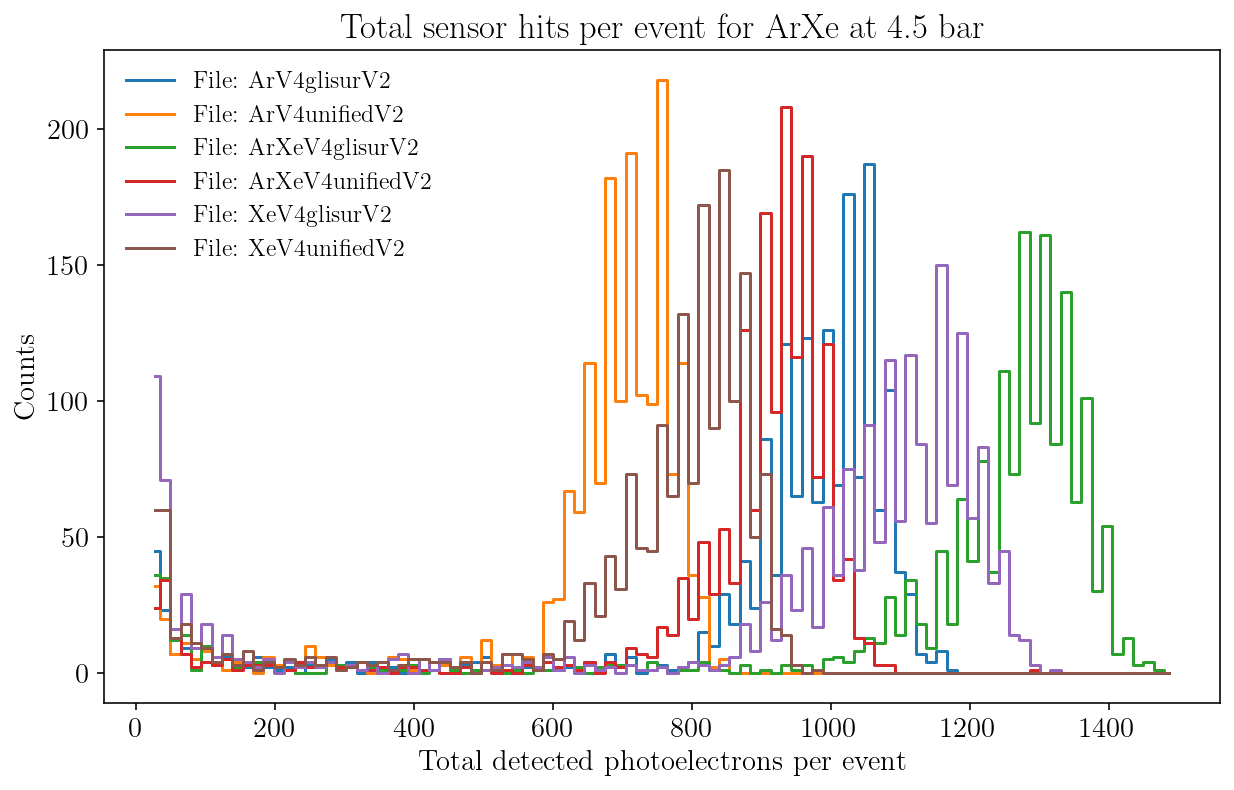

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set this variable to True to use a custom number of bins, or False to use the initial bins
use_custom_bins = True  # Change to True if you want to manually set the number of bins
custom_bins = 100  # Set the desired number of bins here

# Initialize lists to store data for all files
all_bin_centers = []
all_counts = []

for file in files:
    csv_file = data_dir + file
    pressure = csv_file.split('/')[-1].split('_')[3]
    
    # Remove .csv from pressure string
    pressure = pressure.split('.')[0] + '.' + pressure.split('.')[1]
    save_name = f"{gas_name}_{pressure}_{energy}_{date}"
    
    # Open the .csv file and plot the histogram
    df = pd.read_csv(csv_file)
    bin_edges = df['bin_edges'].values
    counts = df['counts'].values
    # Remove the last element of the counts array
    counts = counts[:-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Adjust bins if custom bins are enabled
    if use_custom_bins:
        counts, bin_edges = np.histogram(bin_centers, bins=custom_bins, weights=counts)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Remove the first element from the bin_edges array and counts array
    bin_centers = bin_centers[1:]
    counts = counts[1:]

    # Store the data for plotting later
    all_bin_centers.append(bin_centers)
    all_counts.append(counts)

# Plot all histograms on a single plot
# fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# From the files list, extract only the optical model name, the names follow the format: import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set this variable to True to use a custom number of bins, or False to use the initial bins
use_custom_bins = True  # Change to True if you want to manually set the number of bins
custom_bins = 100  # Set the desired number of bins here

# Initialize lists to store data for all files
all_bin_centers = []
all_counts = []

for file in files:
    csv_file = data_dir + file
    pressure = csv_file.split('/')[-1].split('_')[3]
    
    # Remove .csv from pressure string
    pressure = pressure.split('.')[0] + '.' + pressure.split('.')[1]
    save_name = f"{gas_name}_{pressure}_{energy}_{date}"
    
    # Open the .csv file and plot the histogram
    df = pd.read_csv(csv_file)
    bin_edges = df['bin_edges'].values
    counts = df['counts'].values
    # Remove the last element of the counts array
    counts = counts[:-1]
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Adjust bins if custom bins are enabled
    if use_custom_bins:
        counts, bin_edges = np.histogram(bin_centers, bins=custom_bins, weights=counts)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Remove the first element from the bin_edges array and counts array
    bin_centers = bin_centers[1:]
    counts = counts[1:]

    # Store the data for plotting later
    all_bin_centers.append(bin_centers)
    all_counts.append(counts)

# Plot all histograms on a single plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# From the files list, extract only the optical model name, the names follow the format:

# From the files list, extract only the optical model name, the names follow the format:/home/investigator/Documents/cigar_analysis/data/simulation_cigar/optical_model_tests/sensor_hits/sensor_hits_hist_pressure4.5_glisur.csv

# Edit the files name list to only include the optical model name
files = [f.split('_')[-1].split('.')[0] for f in files]

for i, (bin_centers, counts) in enumerate(zip(all_bin_centers, all_counts)):
    ax.step(bin_centers, counts, where='mid', label=f'File: {files[i]}')

ax.set_xlabel('Total detected photoelectrons per event')
ax.set_ylabel('Counts')
ax.set_title('Total sensor hits per event for ArXe at 4.5 bar')
plt.legend()
plt.savefig(save_dir + save_name + folder + '.' + save_ftype)
plt.show()


[1006.4180546307745, 716.2462349324667, 1295.9822937882893, 935.8116150960212, 1122.303966194202, 822.5090652548347]


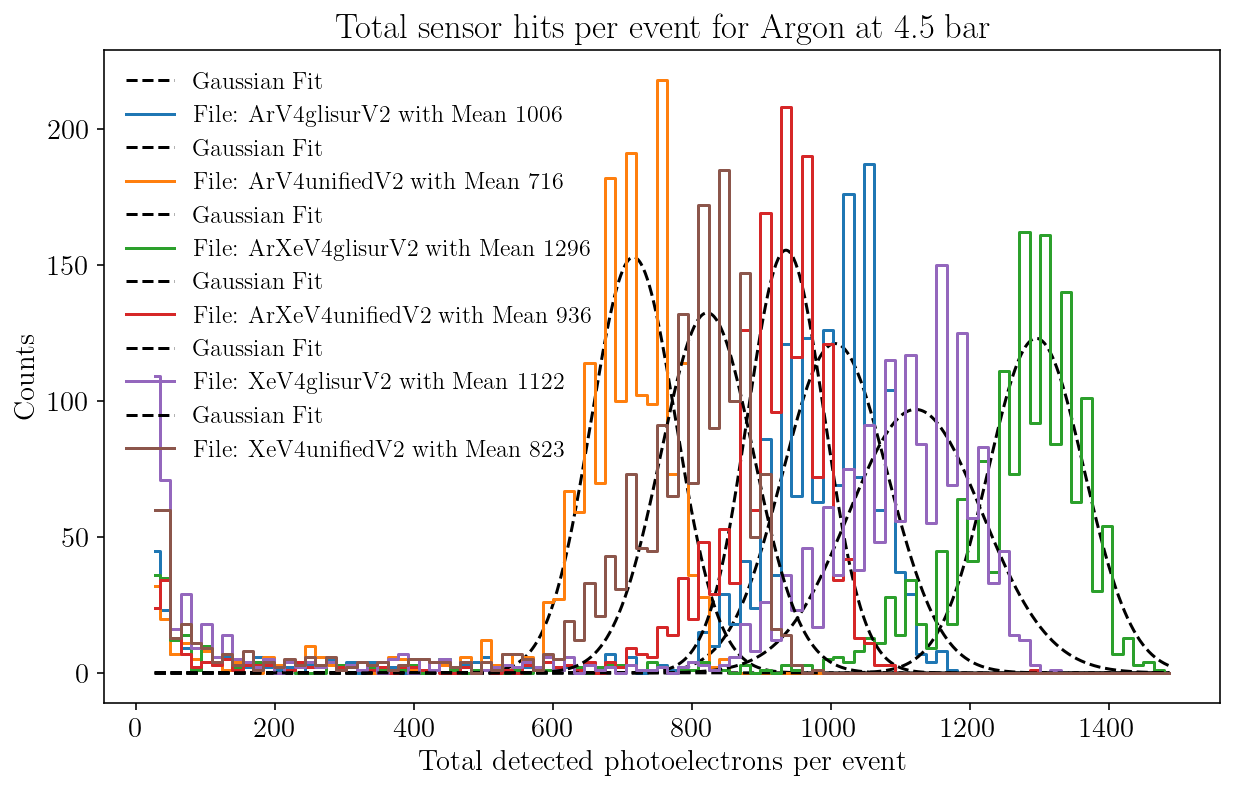

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, amplitude, mean, std_dev):
    return amplitude * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Assuming `all_bin_centers` and `all_counts` are already defined
# Assuming `files` is a list of file names

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis

mean_arr = []
# Loop through each histogram
for i, (bin_centers, counts) in enumerate(zip(all_bin_centers, all_counts)):


    # Calculate the weighted mean and standard deviation as initial guesses
    mean_initial = np.average(bin_centers, weights=counts)
    variance_initial = np.average((bin_centers - mean_initial) ** 2, weights=counts)
    std_dev_initial = np.sqrt(variance_initial)
    amplitude_initial = max(counts)

    # Perform the Gaussian fit using curve_fit
    popt, _ = curve_fit(
        gaussian,
        bin_centers,
        counts,
        p0=[amplitude_initial, mean_initial, std_dev_initial]  # Initial guesses
    )
    amplitude, mean, std_dev = popt

    # Generate Gaussian curve
    x = np.linspace(bin_centers.min(), bin_centers.max(), 1000)
    gaussian_curve = gaussian(x, amplitude, mean, std_dev)

    # Plot the Gaussian fit
    ax.plot(x, gaussian_curve, linestyle='--', label=f'Gaussian Fit', color='black')


    # Plot the histogram
    ax.step(bin_centers, counts, where='mid', label=f'File: {files[i]} with Mean {mean:.0f}')
    mean_arr.append(mean)

print(mean_arr)
# print((mean_arr[1]/mean_arr[2] - 1 )*100)
# print((mean_arr[2]/mean_arr[0] - 1 )*100)
# print((mean_arr[2]/mean_arr[0] - 1 )*100)


# Add labels, title, and legend
ax.set_xlabel('Total detected photoelectrons per event')
ax.set_ylabel('Counts')
ax.set_title('Total sensor hits per event for Argon at 4.5 bar') 
plt.legend()
plt.savefig(save_dir + save_name + folder + '.' + save_ftype)
plt.show()

In [74]:
# import re
# import struct

# file_path_test = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/data_202503_p45/Acq_CAEN_20250304125427-21.bin"


# def daqDecoder(file_path, file_type):
#     data_list   = []
#     channels    = {}  # Dictionary to store {DAQ channel: Real channel}

#     if file_type == 'bin':
#         with open(file_path, "rb") as f:
#             while True:
#                 # Read the header
#                 data = f.read(4)  # Read uint32_t EVID
#                 if not data:
#                     break
#                 EVID = struct.unpack("<I", data)[0]

#                 data = f.read(8)  # Read uint64_t T
#                 if not data:
#                     break
#                 T = struct.unpack("<Q", data)[0]

#                 data = f.read(4)  # Read uint32_t size
#                 if not data:
#                     break
#                 size = struct.unpack("<I", data)[0]

#                 data = f.read(8)  # Read uint64_t sampl_time
#                 if not data:
#                     break
#                 sampl_time = struct.unpack("<Q", data)[0]

#                 data = f.read(4)  # Read uint32_t ch (number of channels)
#                 if not data:
#                     break
#                 ch = struct.unpack("<I", data)[0]

#                 waveform_data = {}

#                 # Read waveforms for each channel
#                 for _ in range(ch):
#                     data = f.read(2)  # Read uint16_t numch
#                     if not data:
#                         break
#                     numch = struct.unpack("<H", data)[0]

#                     channel_waveforms = []
#                     for _ in range(size):
#                         data = f.read(4)  # Read float w
#                         if not data:
#                             break
#                         w = struct.unpack("<f", data)[0]
#                         channel_waveforms.append(w)

#                     # Store waveform with proper mapping
#                     real_ch = (numch // 2) + 1  # Convert DAQ channel to real channel
#                     channels[numch] = real_ch
#                     waveform_data[real_ch] = channel_waveforms  # Use real channel number as key

#                 # Create a row per sample point with all channels aligned
#                 for i in range(size):
#                     row = {
#                         "TIME": (i + 1) * sampl_time / 1e9,  # Convert to seconds
#                         "event": EVID,
#                         "event_time": T
#                     }
                    
#                     # Assign waveform values to proper channels
#                     for real_ch in waveform_data:
#                         row[f'CH{real_ch}'] = waveform_data[real_ch][i] / 1e3  # Convert to the same scale

#                     data_list.append(row)


#     elif file_type == 'txt':
#         with open(file_path, 'r') as f:
#             lines = f.readlines()

#         event_num = None
#         event_time = None
#         time_step = None
#         headers = []

#         for i, line in enumerate(lines):
#             line = line.strip()

#             # Capture Event number
#             if line.startswith("Event n."):
#                 event_num_match = re.search(r"Event n\.\s*(\d+)", line)
#                 if event_num_match:
#                     event_num = int(event_num_match.group(1))  # Capture the number after "Event n."
#                     # print(f"🔹 Found Event number: {event_num}")
#                 else:
#                     print("⚠ Warning: Event number not found.")

#             # Capture TimeStamp
#             elif line.startswith("TimeStamp:"):
#                 event_time_match = re.search(r"TimeStamp:\s*(\d+)", line)
#                 if event_time_match:
#                     event_time = int(event_time_match.group(1))  # Capture the number after "TimeStamp:"
#                     # print(f"🔹 Found Event time: {event_time}")
#                 else:
#                     print("⚠ Warning: Event time not found.")

#             # Capture Sample step value
#             elif line.startswith("1 Sample ="):
#                 time_step_match = re.search(r'0\.[0-9]+', line)
#                 if time_step_match:
#                     time_step = float(time_step_match.group(0))
#                     # print(f"🔹 Found Time step: {time_step}")
#                 else:
#                     print("⚠ Warning: Time step not found.")

#             # Capture Headers (Channel names) using regex
#             elif line.startswith("S") and "CH:" in line:
#                 headers = re.findall(r'CH:\s*(\d+)', line)  # Find all channels after "CH:"
#                 # print(f"📌 Headers detected: {headers}")

#                 # Map DAQ channels to real channels
#                 for daq_ch in headers:
#                     daq_ch = int(daq_ch)  # Convert channel to integer
#                     real_ch = (daq_ch // 2) + 1  # Convert DAQ channel to real channel
#                     channels[daq_ch] = real_ch
#                     # print(f"✅ Mapped DAQ CH {daq_ch} → Real CH {real_ch}")

#             # Capture Data values
#             elif re.match(r'^\d+\s+', line) and headers:
#                 values = line.split()
#                 row = {
#                     "TIME": int(values[0]) * time_step / 1e6,  # Convert time to seconds
#                     "event": event_num,  # Add event number
#                     "event_time": event_time  # Add event time
#                 }

#                 for idx, daq_ch in enumerate(headers):
#                     daq_ch = int(daq_ch)
#                     real_ch = channels[daq_ch]  # Get real channel from map
#                     row[f"CH{real_ch}"] = float(values[idx+1]) / 1000  # Assign the data

#                 # Append row to data
#                 data_list.append(row)

#         # Check if we collected any data
#         if not data_list:
#             print("⚠ Warning: No data captured.")
        

#     # Convert to DataFrame
#     df = pd.DataFrame(data_list)

#     return df, channels


# folder_path_real_data = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/20250304_Ar_Alpha_3.5_noAmp_roomTemp_ANDtrg/"

# # Using the folder path, find all files with the .bin extension
# files_real = [f for f in os.listdir(folder_path_real_data) if f.endswith('.bin')]



In [75]:
# # Loop through each file and use the daqDecoder function, the function stores each file in a dataframe. Store all the dataframes in a list
# dataframes = []
# for file in files_real:
#     file_path = os.path.join(folder_path_real_data, file)
#     print(f"Processing file: {file_path}")
#     df, channels = daqDecoder(file_path, 'bin')
#     dataframes.append(df)
#     # Stop after the second file
#     if len(dataframes) == 5:
#         break

In [76]:

# folder_path_calibration_ch1 = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/CH1/"
# folder_path_calibration_ch2 = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/CH2/"
# folder_path_calibration_ch3 = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/CH3/"
# folder_path_calibration_ch4 = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/CH4/"

# files_ch1 = [f for f in os.listdir(folder_path_calibration_ch1) if f.endswith('.txt')]
# files_ch2 = [f for f in os.listdir(folder_path_calibration_ch2) if f.endswith('.txt')]
# files_ch3 = [f for f in os.listdir(folder_path_calibration_ch3) if f.endswith('.txt')]
# files_ch4 = [f for f in os.listdir(folder_path_calibration_ch4) if f.endswith('.txt')]


# calibration_data_ch1 = []
# calibration_data_ch2 = []
# calibration_data_ch3 = []
# calibration_data_ch4 = []


# def calibration_arr(files, folder_path, save_list):
#     for file in tqdm(files):
#         file_path = os.path.join(folder_path, file)
#         print(f"Processing file: {file_path}")
#         df, channels = daqDecoder(file_path, 'txt')
#         save_list.append(df)

#     return save_list


In [77]:
# calibration_data_ch1 = calibration_arr(files_ch1, folder_path_calibration_ch1, calibration_data_ch1)
# calibration_data_ch1 = calibration_arr(files_ch2, folder_path_calibration_ch2, calibration_data_ch2)
# calibration_data_ch1 = calibration_arr(files_ch3, folder_path_calibration_ch3, calibration_data_ch3)
# calibration_data_ch1 = calibration_arr(files_ch4, folder_path_calibration_ch4, calibration_data_ch4)


In [78]:
# # Get a list of all unique event IDs
# unique_event_ids = calibration_data_ch1[0]['event'].unique()

# # Specify the index of the event you want to plot (e.g., 0 for the first event, 1 for the second, etc.)
# event_index_to_plot = 3  # Replace this with the desired index

# # Check if the index is valid
# if event_index_to_plot >= len(unique_event_ids):
#     print(f"Invalid event index {event_index_to_plot}. There are only {len(unique_event_ids)} unique events.")
# else:
#     # Get the event ID corresponding to the specified index
#     event_id_to_plot = unique_event_ids[event_index_to_plot]

#     # Filter the DataFrame for the specified event
#     event_data = calibration_data_ch1[0][calibration_data_ch1[0]['event'] == event_id_to_plot]

#     # Plot the waveform for the specified event
#     plt.figure(figsize=(10, 6))
#     plt.plot(event_data['TIME'].to_numpy(), event_data['CH2'].to_numpy(), label="Waveform")  # Convert Series to NumPy arrays

#     # Add a vertical line at the 100th point
#     if len(event_data) > 100:
#         plt.axvline(x=event_data['TIME'].iloc[100], color='red', linestyle='--', label="100th Point")
#     else:
#         print(f"Event ID {event_id_to_plot} has fewer than 100 points, no vertical line added.")

#     # Add labels, title, and grid
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude (mV)')
#     plt.title(f'Waveform from CH1 for Event {event_id_to_plot}')
#     plt.legend()
#     plt.grid()
#     plt.show()
# print(calibration_data_ch1)

In [79]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks, savgol_filter
# from scipy.integrate import simps  # for numerical integration

# # Get the waveform
# time = event_data['TIME'].to_numpy()
# amplitude = event_data['CH2'].to_numpy()

# # Optional: smooth the waveform to reduce noise (adjust window and polyorder if needed)
# smoothed = savgol_filter(amplitude, window_length=11, polyorder=2)

# # Step 1: Peak detection
# # Adjust 'height' and 'distance' to match your single-photon pulse characteristics
# peaks, properties = find_peaks(amplitude, height=0.2, distance=10)  # height in mV, distance in samples

# # Step 2: Integrate around each detected peak
# integration_window_ns = 50  # integration width in ns, total window size
# integration_results = []

# for peak in peaks:
#     # Find time indices ± half the window around the peak
#     t_peak = time[peak]
#     t_left = t_peak - integration_window_ns / 2e9  # convert ns to seconds
#     t_right = t_peak + integration_window_ns / 2e9

#     # Get indices within the integration window
#     window_mask = (time >= t_left) & (time <= t_right)

#     # Integrate the signal in this window using Simpson's rule
#     area = simps(amplitude[window_mask], time[window_mask])
#     integration_results.append(area)

# # Step 3: Plot results
# plt.figure(figsize=(10, 6))
# plt.plot(time, amplitude, label="Raw waveform")
# plt.plot(time, smoothed, label="Smoothed waveform", alpha=0.7)
# plt.plot(time[peaks], smoothed[peaks], "x", label="Detected peaks", color="red")

# for peak in peaks:
#     plt.axvline(time[peak], linestyle="--", color="gray", alpha=0.5)

# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude (mV)")
# plt.title("Detected Single Photon Peaks and Integration Windows")
# plt.legend()
# plt.grid()
# plt.show()

# # Step 4: (Optional) Histogram of integrated pulse areas (i.e., your finger plot)
# plt.figure(figsize=(8, 5))
# plt.hist(integration_results, bins=100, histtype="step", color="blue")
# plt.xlabel("Integrated Charge (a.u.)")
# plt.ylabel("Counts")
# plt.title("Finger Plot - Single Photon Peaks")
# plt.grid()
# plt.show()


In [80]:
#  # for progress bar (optional)

# def process_event_waveform(event_data, channel='CH2', integration_window_ns=50,
#                            smoothing_window=11, polyorder=2, peak_height=0.2, peak_distance=10):
#     time = event_data['TIME'].to_numpy()
#     amplitude = event_data[channel].to_numpy()

#     # Smooth waveform
#     smoothed = savgol_filter(amplitude, window_length=smoothing_window, polyorder=polyorder)

#     # Find peaks
#     peaks, _ = find_peaks(amplitude, height=peak_height, distance=peak_distance)

#     # Integrate around peaks
#     integration_results = []
#     for peak in peaks:
#         t_peak = time[peak]
#         t_left = t_peak - integration_window_ns / 2e9
#         t_right = t_peak + integration_window_ns / 2e9
#         window_mask = (time >= t_left) & (time <= t_right)
#         area = simps(amplitude[window_mask], time[window_mask])
#         integration_results.append(area)
    
    

#     return integration_results




In [81]:
# all_integration_values = []

# for file_df in tqdm(calibration_data_ch1):  # loop through each file
#     for _, event_data in file_df.groupby('event'):
#         results = process_event_waveform(event_data)
#         all_integration_values.extend(results)  # flatten results directly

# # Convert to a flat DataFrame
# df_integration_values = pd.DataFrame({'integration': all_integration_values})
# # Save the DataFrame to a CSV file
# df_integration_values.to_csv('/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/single_phe_calibration_histograms/integration_values_ch4.csv', index=False)

In [82]:
# # Read in the CSV files as four different dataframes, each for one channel

# n_bins = 200

# df_ch1 = pd.read_csv('/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/single_phe_calibration_histograms/integration_values_ch1.csv')
# df_ch2 = pd.read_csv('/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/single_phe_calibration_histograms/integration_values_ch2.csv')
# df_ch3 = pd.read_csv('/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/single_phe_calibration_histograms/integration_values_ch3.csv')
# df_ch4 = pd.read_csv('/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/single_phe_calibration_histograms/integration_values_ch4.csv')

# # Plot the four dataframes on the same plot
# fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed
# # Set colour to dark red
# ax.hist(df_ch1['integration'], bins=n_bins, histtype='step', label='CH1')
# ax.hist(df_ch2['integration'], bins=n_bins, histtype='step', label='CH2')
# ax.hist(df_ch3['integration'], bins=n_bins, histtype='step', label='CH3')
# ax.hist(df_ch4['integration'], bins=n_bins, histtype='step', label='CH4')

# # Add labels, title, and legend
# ax.set_xlabel('Integrated Charge (a.u.)')
# ax.set_ylabel('Counts')
# ax.set_title('Finger Plot - Single Photon Peaks')
# plt.legend()
# plt.grid()
# plt.show()



In [83]:
# Find all subdirectories in the data_dir

data_directory = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/hist_Ar/"
# data_directory = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/hist_ArXe/"

subdirectories = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, d))]
# Sort the subdirectories by name
subdirectories.sort()

# Concatenate the data_directory with the subdirectory names
subdirectories = [os.path.join(data_directory, d) for d in subdirectories]
# Add the file name to the end of each subdirectory
specific_file_name = "IntegralSum_Phes.pkl"
subdirectories = [os.path.join(d, specific_file_name) for d in subdirectories]


# Try opening a file to check if it exists
try:
    with open(subdirectories[0], 'rb') as file:  # Open the file in binary read mode
        print("File exists")
except FileNotFoundError:
    print("File does not exist")
    # If the file does not exist, exit the program
    exit()
    

File exists


1.5


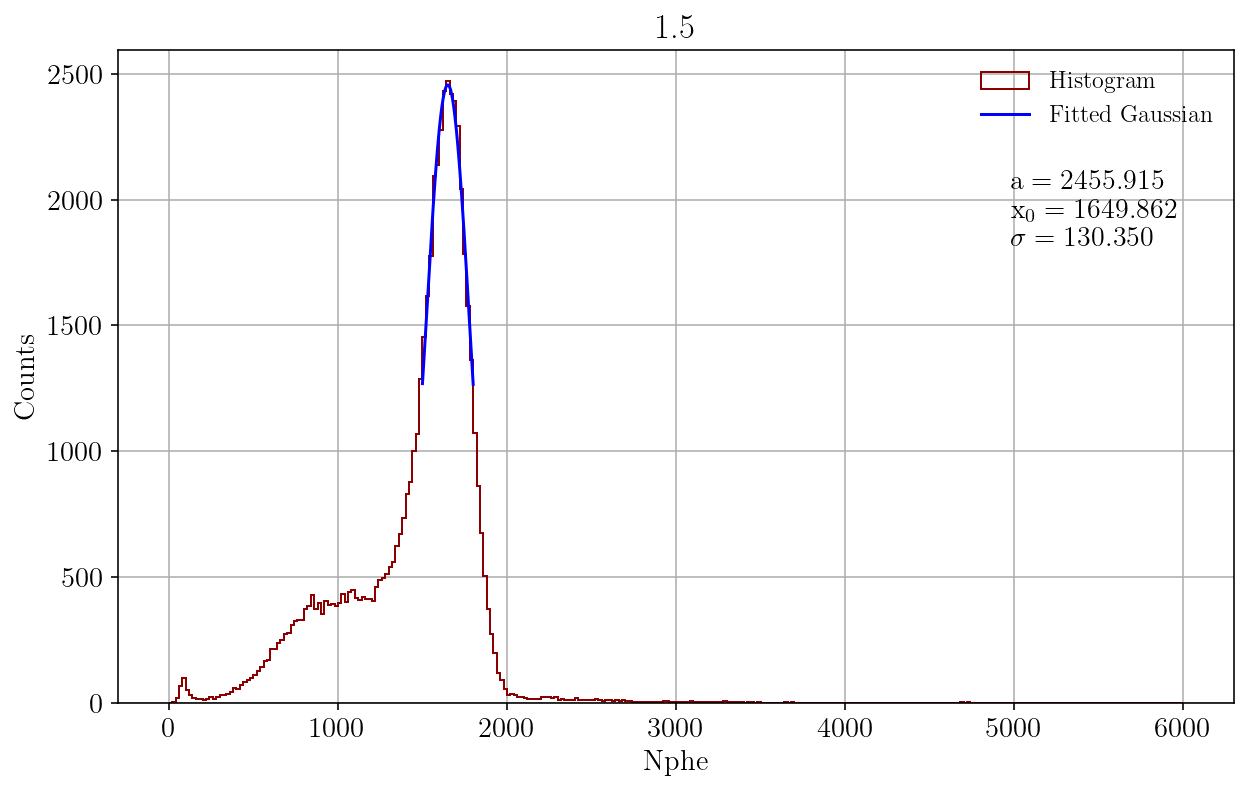

/tmp/ipykernel_15580/1164737941.py:117: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fit_parameters_df = pd.concat([fit_parameters_df, pd.DataFrame([{


2.5


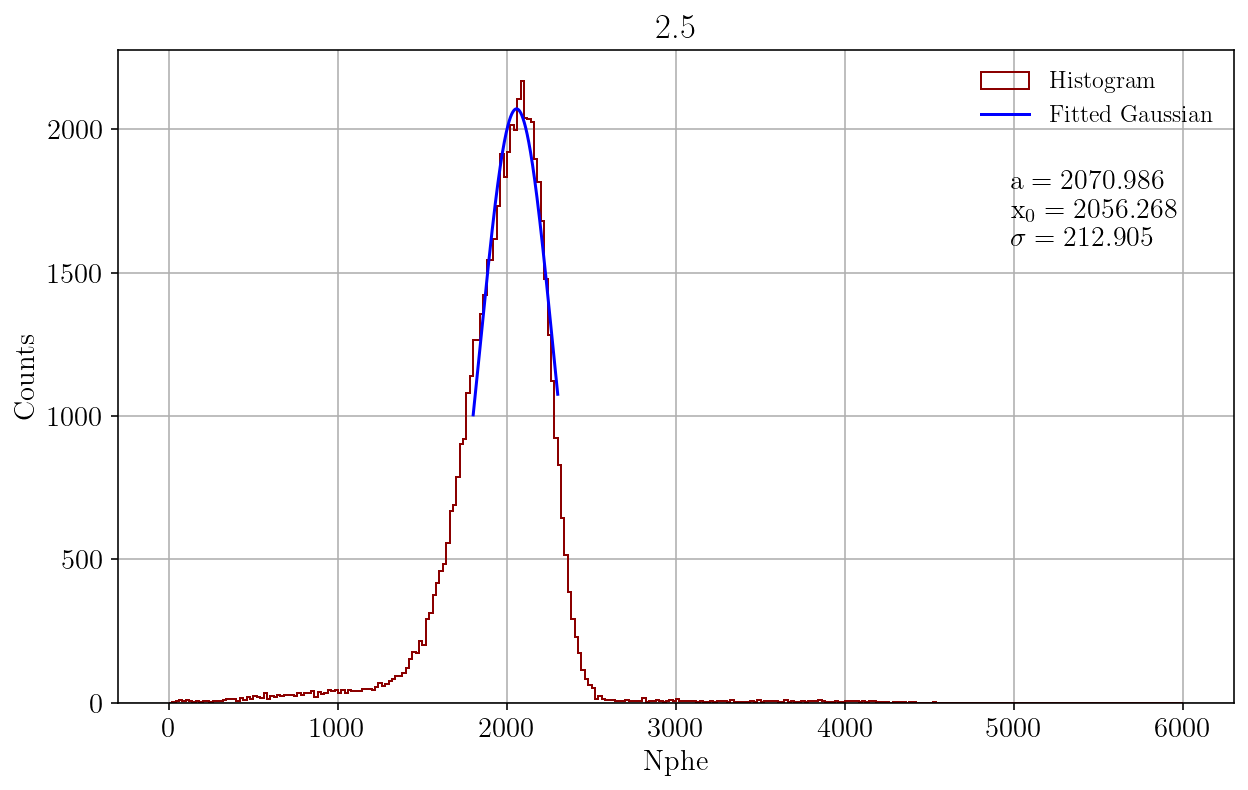

3.5


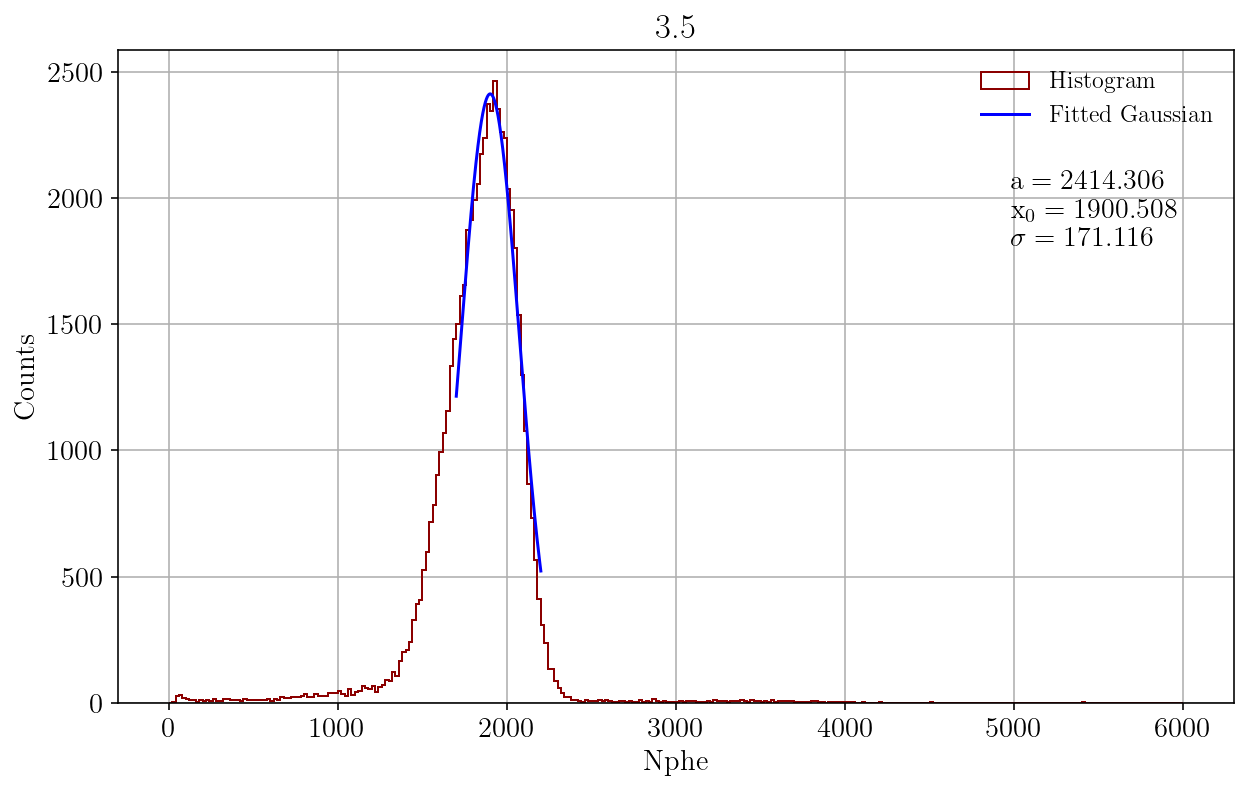

4.5


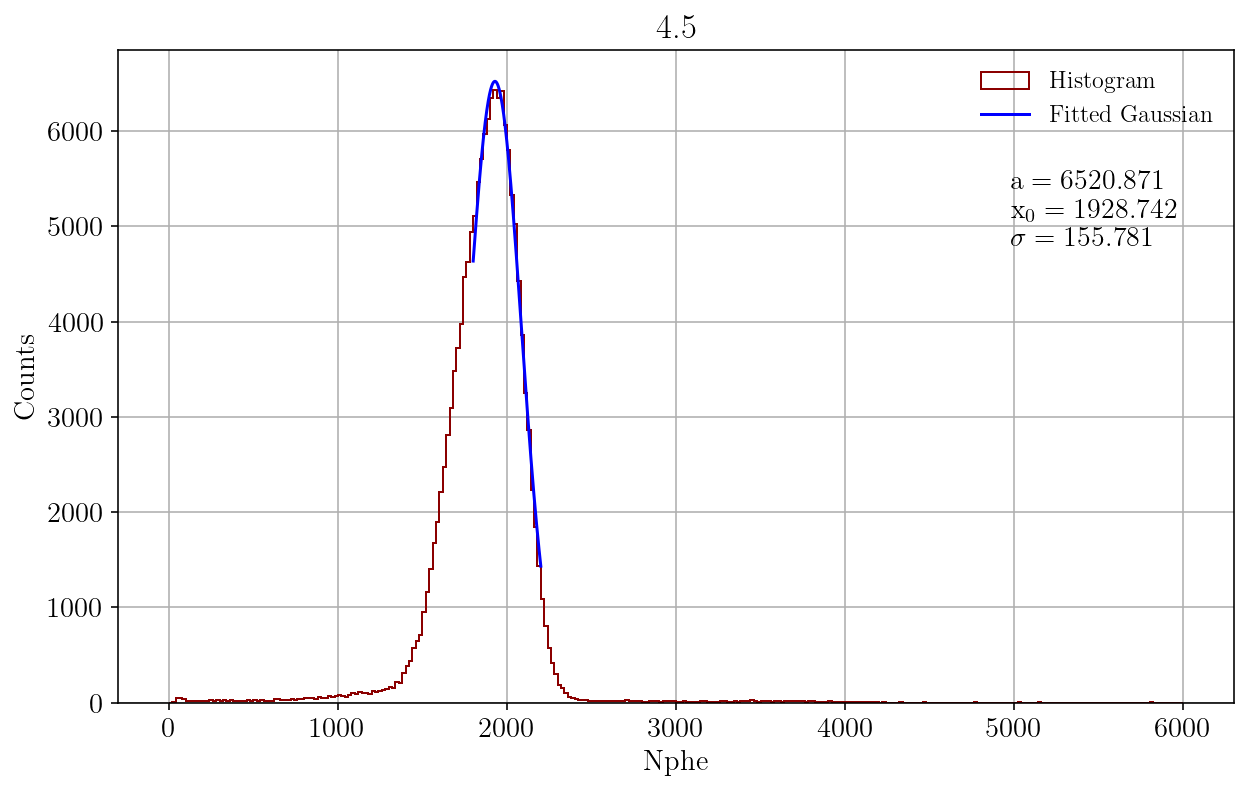

5.5


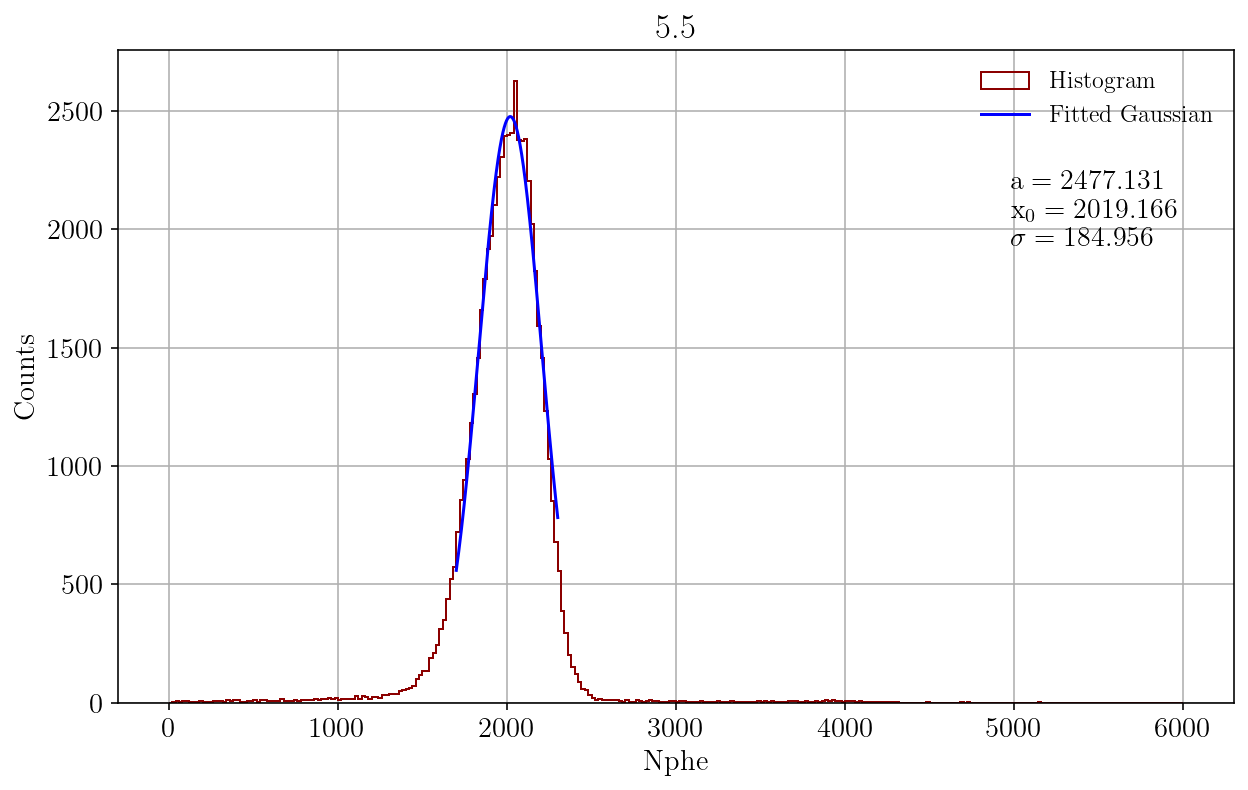

6.5


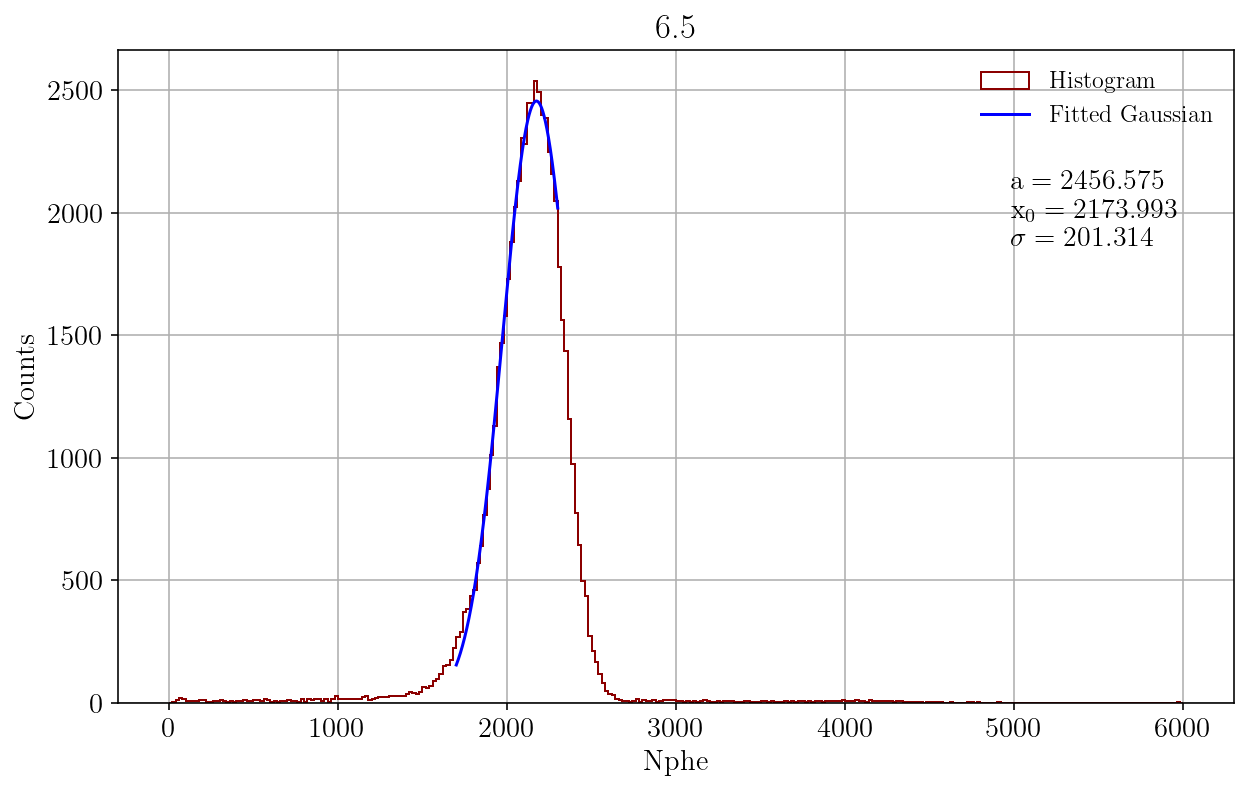

7.5


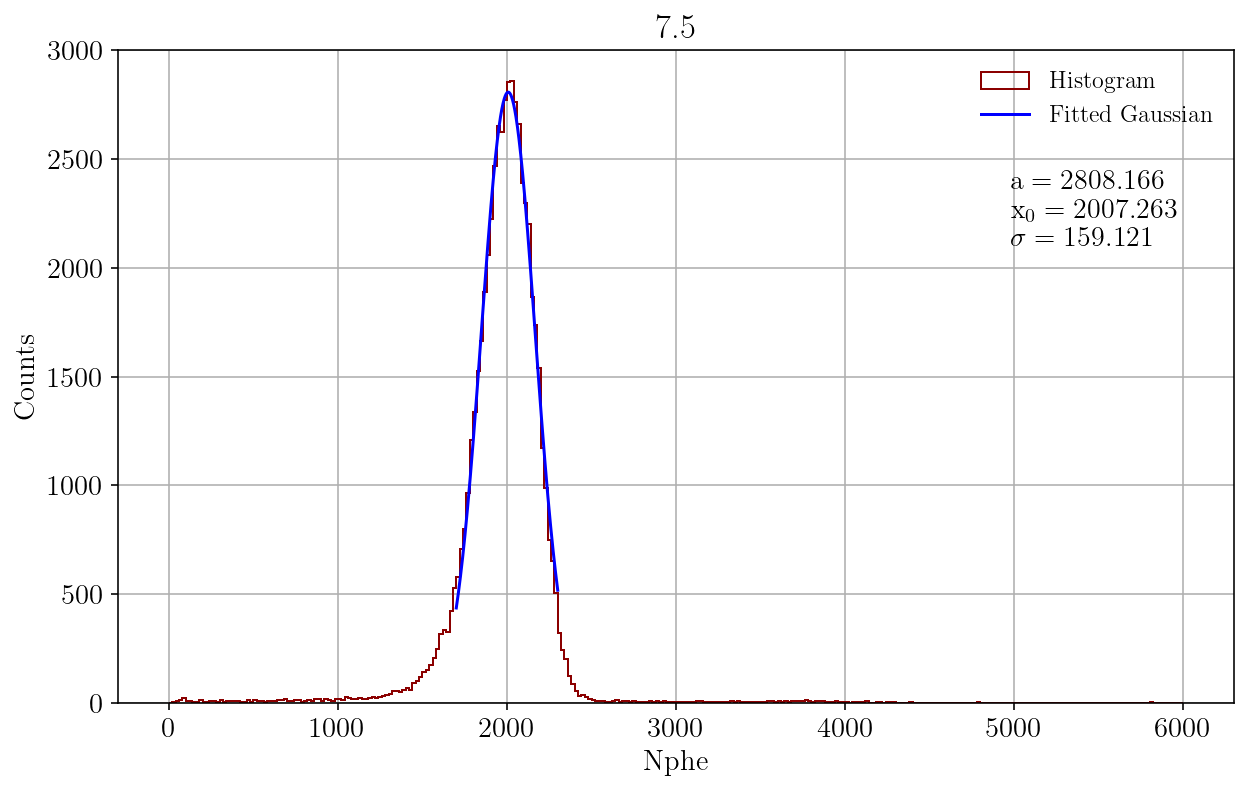

8.5


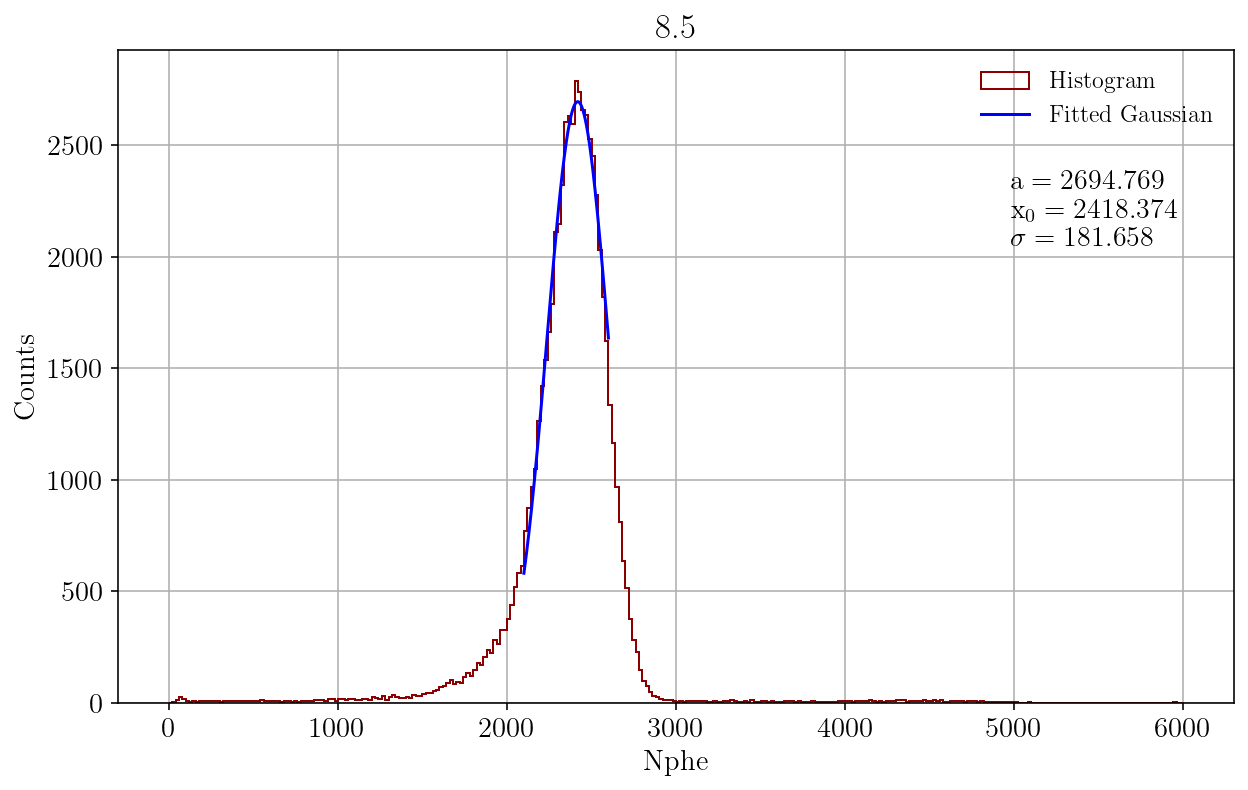

  Pressure            a           x0       sigma
0      1.5  2455.914817  1649.861592  130.349624
1      2.5  2070.985939  2056.267926  212.905219
2      3.5  2414.306399  1900.508038  171.115689
3      4.5  6520.870560  1928.741798  155.780678
4      5.5  2477.131184  2019.166050  184.956376
5      6.5  2456.574997  2173.993474  201.313877
6      7.5  2808.165735  2007.262875  159.120686
7      8.5  2694.769481  2418.373661  181.657932


In [84]:
# ArXe

# Open a real data post correction file
import pickle


# Initialize an empty DataFrame to store the fitting parameters
fit_parameters_df = pd.DataFrame(columns=["Pressure", "a", "x0", "sigma"])

def plot_histogram(file_path, save_dir, save_name, save_ftype, folder):
    # Load the data
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        
    pressure = file_path.split('/')[-2]
    pressure = pressure.split('_')[2]
    # Remove the Bar from the 1.5Bar from the pressure string
    pressure = pressure.split('Bar')[0] + pressure.split('Bar')[1]
    print(pressure)

    bins = data['bins']
    counts = data['counts']
    



    # Compute bin centers
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    # Divide bincentres by 2 to account for incorrect measurement settings
    bin_centers = bin_centers
    if pressure == '0.000':
        fitting_range = (0, 5000)
        x_fit = np.linspace(0, 5000, 1000)
    if pressure == '1.5':
        fitting_range = (1500, 1800)
        x_fit = np.linspace(1500, 1800, 1000)
    elif pressure == '2.5':
        fitting_range = (1800, 2300)
        x_fit = np.linspace(1800, 2300, 1000)
    elif pressure == '3.5':
        fitting_range = (1700, 2200)
        x_fit = np.linspace(1700, 2200, 1000)
    elif pressure == '4.5':
        fitting_range = (1800, 2200)
        x_fit = np.linspace(1800, 2200, 1000)
    elif pressure == '5.5':
        fitting_range = (1700, 2300)
        x_fit = np.linspace(1700, 2300, 1000)
    elif pressure == '6.5':
        fitting_range = (1700, 2300)
        x_fit = np.linspace(1700, 2300, 1000)
    elif pressure == '7.5':
        fitting_range = (1700, 2300)
        x_fit = np.linspace(1700, 2300, 1000)
    elif pressure == '8.5':
        fitting_range = (2100, 2600)
        x_fit = np.linspace(2100, 2600, 1000)
    else:
        fitting_range = (0, 5000)
        x_fit = np.linspace(min(bin_centers), max(bin_centers), 1000)    
    mask = (bin_centers >= fitting_range[0]) & (bin_centers <= fitting_range[1])
    bin_centers_filtered = bin_centers[mask]
    counts_filtered = counts[mask]

    # Fit the data with a Gaussian
    def gaussian(x, a, x0, sigma):
        return a * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))

    # Fit the histogram data
    popt, pcov = curve_fit(gaussian, bin_centers_filtered, counts_filtered, p0=[max(counts_filtered), np.mean(bin_centers_filtered), np.std(bin_centers_filtered)])
    a, x0, sigma = popt

    # Generate x values for the fitted Gaussian
    # x_fit = np.linspace(min(bin_centers), max(bin_centers), 1000)
    y_fit = gaussian(x_fit, *popt)

    # Plot the histogram and the fitted Gaussian
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(bin_centers, bins=bins, weights=counts, histtype='step', label='Histogram', color='darkred')
    ax.plot(x_fit, y_fit, label='Fitted Gaussian', color='blue')
    ax.set_xlabel('Nphe')
    ax.set_ylabel('Counts')
    ax.set_title(pressure)
    # Add text to the plot with the fitted parameters
    textstr = '\n'.join((
        r'$\mathrm{a}=%5.3f$' % (a, ),
        r'$\mathrm{x_0}=%5.3f$' % (x0, ),
        r'$\mathrm{\sigma}=%5.3f$' % (sigma, )
    ))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    plt.text(0.80, 0.70, textstr, transform=ax.transAxes, fontsize=14)
    plt.legend()
    plt.grid()
    plt.savefig(save_dir + save_name + folder + '.' + save_ftype)
    plt.show()

    # Return the fitting parameters and pressure
    return pressure, a, x0, sigma



# Loop through subdirectories and save fitting parameters to the DataFrame
for i in subdirectories:
    # Get the pressure from the subdirectory name (assuming it is the last part of the path)
    pressure = i.split('/')[-2]
    
    # Remove .csv from pressure string
    pressure = pressure.split('.')[0] + '.' + pressure.split('.')[1]
    save_name = f"{gas_name}_{pressure}_{energy}_{date}"
    
    # Call the plot_histogram function and get the fitting parameters
    pressure, a, x0, sigma = plot_histogram(i, save_dir, save_name, save_ftype, folder)
    
    # Append the fitting parameters to the DataFrame
    fit_parameters_df = pd.concat([fit_parameters_df, pd.DataFrame([{
        "Pressure": pressure,
        "a": a,
        "x0": x0,
        "sigma": sigma
    }])], ignore_index=True)

print(fit_parameters_df)



In [85]:
# # ArXe

# # Open a real data post correction file
# import pickle


# # Initialize an empty DataFrame to store the fitting parameters
# fit_parameters_df = pd.DataFrame(columns=["Pressure", "a", "x0", "sigma"])

# def plot_histogram(file_path, save_dir, save_name, save_ftype, folder):
#     # Load the data
#     with open(file_path, 'rb') as f:
#         data = pickle.load(f)
        
#     pressure = file_path.split('/')[-2]
#     pressure = pressure.split('_')[2]
#     # Remove the Bar from the 1.5Bar from the pressure string
#     pressure = pressure.split('Bar')[0] + pressure.split('Bar')[1]
#     print(pressure)

#     bins = data['bins']
#     counts = data['counts']
    


#     # Compute bin centers
#     bin_centers = 0.5 * (bins[:-1] + bins[1:])
#     # Divide bincentres by 2 to account for incorrect measurement settings
#     bin_centers = bin_centers
#     if pressure == '0.000':
#         fitting_range = (0, 5000)
#         x_fit = np.linspace(0, 5000, 1000)
#     if pressure == '1.5':
#         fitting_range = (1050, 1400)
#         x_fit = np.linspace(1050, 1400, 1000)
#     elif pressure == '2.5':
#         fitting_range = (1200, 1600)
#         x_fit = np.linspace(1200, 1600, 1000)
#     elif pressure == '3.5':
#         fitting_range = (1700, 2200)
#         x_fit = np.linspace(1700, 2200, 1000)
#     elif pressure == '4.5':
#         fitting_range = (1800, 2300)
#         x_fit = np.linspace(1800, 2300, 1000)
#     elif pressure == '5.5':
#         fitting_range = (2100, 2600)
#         x_fit = np.linspace(2100, 2600, 1000)
#     elif pressure == '6.5':
#         fitting_range = (2100, 2600)
#         x_fit = np.linspace(2100, 2600, 1000)
#     elif pressure == '7.5':
#         fitting_range = (2600, 3100)
#         x_fit = np.linspace(2600, 3100, 1000)
#     elif pressure == '8.5':
#         fitting_range = (2800, 3200)
#         x_fit = np.linspace(2800, 3200, 1000)
#     else:
#         fitting_range = (0, 5000)
#         x_fit = np.linspace(min(bin_centers), max(bin_centers), 1000)    
#     mask = (bin_centers >= fitting_range[0]) & (bin_centers <= fitting_range[1])
#     bin_centers_filtered = bin_centers[mask]
#     counts_filtered = counts[mask]

#     # Fit the data with a Gaussian
#     def gaussian(x, a, x0, sigma):
#         return a * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))

#     # Fit the histogram data
#     popt, pcov = curve_fit(gaussian, bin_centers_filtered, counts_filtered, p0=[max(counts_filtered), np.mean(bin_centers_filtered), np.std(bin_centers_filtered)])
#     a, x0, sigma = popt

#     # Generate x values for the fitted Gaussian
#     # x_fit = np.linspace(min(bin_centers), max(bin_centers), 1000)
#     y_fit = gaussian(x_fit, *popt)

#     # Plot the histogram and the fitted Gaussian
#     fig, ax = plt.subplots(figsize=(10, 6))
#     ax.hist(bin_centers, bins=bins, weights=counts, histtype='step', label='Histogram', color='darkred')
#     ax.plot(x_fit, y_fit, label='Fitted Gaussian', color='blue')
#     ax.set_xlabel('Nphe')
#     ax.set_ylabel('Counts')
#     ax.set_title(pressure)
#     # Add text to the plot with the fitted parameters
#     textstr = '\n'.join((
#         r'$\mathrm{a}=%5.3f$' % (a, ),
#         r'$\mathrm{x_0}=%5.3f$' % (x0, ),
#         r'$\mathrm{\sigma}=%5.3f$' % (sigma, )
#     ))
#     # these are matplotlib.patch.Patch properties
#     props = dict(boxstyle='round', facecolor='white', alpha=0.5)

#     plt.text(0.80, 0.70, textstr, transform=ax.transAxes, fontsize=14)
#     plt.legend()
#     plt.grid()
#     plt.savefig(save_dir + save_name + folder + '.' + save_ftype)
#     plt.show()

#     # Return the fitting parameters and pressure
#     return pressure, a, x0, sigma



# # Loop through subdirectories and save fitting parameters to the DataFrame
# for i in subdirectories:
#     # Get the pressure from the subdirectory name (assuming it is the last part of the path)
#     pressure = i.split('/')[-2]
    
#     # Remove .csv from pressure string
#     pressure = pressure.split('.')[0] + '.' + pressure.split('.')[1]
#     save_name = f"{gas_name}_{pressure}_{energy}_{date}"
    
#     # Call the plot_histogram function and get the fitting parameters
#     pressure, a, x0, sigma = plot_histogram(i, save_dir, save_name, save_ftype, folder)
    
#     # Append the fitting parameters to the DataFrame
#     fit_parameters_df = pd.concat([fit_parameters_df, pd.DataFrame([{
#         "Pressure": pressure,
#         "a": a,
#         "x0": x0,
#         "sigma": sigma
#     }])], ignore_index=True)

# print(fit_parameters_df)



In [86]:
# file_path_sim = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/correction_factors_results_V4_Ar_all_pressures_max_withoutfit.csv"
file_path_sim = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/correction_factors_results_V4_Ar_all_pressures.csv"


# fit_parameters_df

# Open simulation data as pandas dataframe

df_sim = pd.read_csv(file_path_sim)
# print(df_sim)

try:
    # Strip the 'V6pressure' prefix from the Pressure column
    df_sim['Pressure'] = df_sim['Pressure'].str.replace('V6pressure', '', regex=False)
except AttributeError:
    # Continue without trying to replace the prefix
    pass

# print(df_sim)
df_sim['Pressure'] = df_sim['Pressure'].astype(float)        # Data type of pressure from fit_parameters_df


def efficiency_calculations(n_detected, n_detectable, n_detected_err, n_detectable_err):
    efficiency = ((n_detected/2) / n_detectable)*100
    
    efficiency_error = efficiency * np.sqrt((n_detected_err/n_detected)**2 + (n_detectable_err/n_detectable)**2)
    # Return the efficiency with two significant figures
    efficiency = "{:.3f}".format(efficiency)
    return efficiency, efficiency_error


efficiency_df = pd.DataFrame(columns=["Pressure", "Efficiency %", "Efficiency Error %", "Efficiency Error Systematic %"])
for pressure in fit_parameters_df['Pressure'].unique():
    # Get the x0 value for the current pressure
    x0 = fit_parameters_df[fit_parameters_df['Pressure'] == pressure]['x0'].values[0]
    sigma = fit_parameters_df[fit_parameters_df['Pressure'] == pressure]['sigma'].values[0]
    # Get the n_detectable value for the current pressure
    pressure_value = float(pressure)
    try:
        n_detectable = df_sim[df_sim['Pressure'] == pressure_value]['Detectable Value'].values[0]
        
        n_detectable_err = df_sim[df_sim['Pressure'] == pressure_value]['Detectable Error'].values[0]
        sys_err = df_sim[df_sim['Pressure'] == pressure_value]['Correction Factor Absolute'].values[0]

        # Calculate the efficiency
        efficiency, efficiency_err = efficiency_calculations(x0, n_detectable, sigma,n_detectable_err)
        
        # Systematic error
        _, efficiency_err_sys = efficiency_calculations(x0, n_detectable, sigma,sys_err)
        # Append the efficiency to the DataFrame
        efficiency_df = pd.concat([efficiency_df, pd.DataFrame([{
            "Pressure": pressure,
            "Efficiency %": efficiency,
            "Efficiency Error %": efficiency_err,
            "Efficiency Error Systematic %": efficiency_err_sys
            
        }])], ignore_index=True)
    except IndexError:
        # print("Index Error")
        continue


print(efficiency_df)





# if len(df_sim[df_sim['Gas'] == 'Ar']['Detectable Value'].values) > 1:
#     n_detectable_glisur = df_sim[(df_sim['Gas'] == 'Ar') & (df_sim['Optical Model'] == 'Glisur')]['Detectable Value'].values[0]
#     n_detectable_unified = df_sim[(df_sim['Gas'] == 'Ar') & (df_sim['Optical Model'] == 'Unified')]['Detectable Value'].values[0]
#     print("Glisur model: " + str(efficiency_calculations(x0, n_detectable_glisur)) + " %")
#     print("Unified model: " + str(efficiency_calculations(x0, n_detectable_unified)) + " %")
# else:
#     n_detectable = df_sim[df_sim['Gas'] == 'Ar']['Detectable Value'].values[0]
#     print(str(efficiency_calculations(x0, n_detectable)) + " %")



  Pressure Efficiency %  Efficiency Error %  Efficiency Error Systematic %
0      1.5        1.169            0.092441                       0.092694
1      2.5        1.661            0.172068                       0.173006
2      3.5        1.491            0.134358                       0.137006
3      4.5        1.471            0.118947                       0.121429
4      5.5        1.419            0.130145                       0.131997
5      6.5        1.373            0.127356                       0.128158
6      7.5        1.154            0.091637                       0.092559
7      8.5        1.277            0.096160                       0.096878


/tmp/ipykernel_15580/1980106199.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  efficiency_df = pd.concat([efficiency_df, pd.DataFrame([{


In [87]:
# # file_path_sim = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/correction_factors_results_V4_Ar_all_pressures_max_withoutfit.csv"
# file_path_sim = "/home/investigator/Documents/cigar_analysis/data/simulation_cigar/real_data/correction_factors_results_ArV4.csv"


# # fit_parameters_dfa

# # Open simulation data as pandas dataframe

# df_sim = pd.read_csv(file_path_sim)

# # Strip the 'V6pressure' prefix from the Pressure column
# df_sim['Pressure'] = df_sim['Pressure'].str.replace('V6pressure', '', regex=False)

# print(df_sim)


# def efficiency_calculations(n_detected, n_detectable, n_detected_err, n_detectable_err):
#     efficiency = ((n_detected/2) / n_detectable)*100
    
#     efficiency_error = efficiency * np.sqrt((n_detected_err/n_detected)**2 + (n_detectable_err/n_detectable)**2)
#     # Return the efficiency with two significant figures
#     efficiency = "{:.3f}".format(efficiency)
#     return efficiency, efficiency_error


# efficiency_df = pd.DataFrame(columns=["Pressure", "Efficiency %", "Efficiency Error %", "Corrected Detected"
#                                       , "Corrected Detected Error", "Uncorrected Detected", "Uncorrected Detected Error"])

# for pressure in fit_parameters_df['Pressure'].unique():
#     # Get the x0 value for the current pressure
#     x0 = fit_parameters_df[fit_parameters_df['Pressure'] == pressure]['x0'].values[0]
#     sigma = fit_parameters_df[fit_parameters_df['Pressure'] == pressure]['sigma'].values[0]

#     # Get the n_detectable value for the current pressure
#     try:
#         n_detectable = df_sim[df_sim['Pressure'] == pressure]['Detectable Value'].values[0]
#         n_detectable_err = df_sim[df_sim['Pressure'] == pressure]['Detectable Error'].values[0]
#         correction_fraction = df_sim[df_sim['Pressure'] == pressure]['Detection Fraction'].values[0]
#         correction_fraction_error = df_sim[df_sim['Pressure'] == pressure]['Detection Fraction Error'].values[0]
#         # Calculate the efficiency
#         efficiency, efficiency_err = efficiency_calculations(x0, n_detectable, sigma,n_detectable_err)
#         # Append the efficiency to the DataFrame
#         efficiency_df = pd.concat([efficiency_df, pd.DataFrame([{
#             "Pressure": pressure,
#             "Efficiency %": efficiency,
#             "Efficiency Error %": efficiency_err,
#             "Corrected Detected": ((x0 * correction_fraction) + x0),
#             "Corrected Detected Error": (sigma + ((x0 * correction_fraction) * np.sqrt((correction_fraction_error/correction_fraction)**2 + (sigma/x0)**2))),
#             "Uncorrected Detected": x0 ,
#             "Uncorrected Detected Error": sigma
            
            
#         }])], ignore_index=True)
#     except IndexError:
#         continue


# print(efficiency_df)





# # if len(df_sim[df_sim['Gas'] == 'Ar']['Detectable Value'].values) > 1:
# #     n_detectable_glisur = df_sim[(df_sim['Gas'] == 'Ar') & (df_sim['Optical Model'] == 'Glisur')]['Detectable Value'].values[0]
# #     n_detectable_unified = df_sim[(df_sim['Gas'] == 'Ar') & (df_sim['Optical Model'] == 'Unified')]['Detectable Value'].values[0]
# #     print("Glisur model: " + str(efficiency_calculations(x0, n_detectable_glisur)) + " %")
# #     print("Unified model: " + str(efficiency_calculations(x0, n_detectable_unified)) + " %")
# # else:
# #     n_detectable = df_sim[df_sim['Gas'] == 'Ar']['Detectable Value'].values[0]
# #     print(str(efficiency_calculations(x0, n_detectable)) + " %")



In [88]:
# print(df_sim.head())

In [89]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Print the DataFrame for verification
# print(efficiency_df)

# # Ensure the 'Efficiency %' column is numeric
# efficiency_df['Corrected Detected'] = pd.to_numeric(efficiency_df['Corrected Detected'], errors='coerce')
# efficiency_df['Uncorrected Detected'] = pd.to_numeric(efficiency_df['Uncorrected Detected'], errors='coerce')
# efficiency_df['Corrected Detected Error'] = pd.to_numeric(efficiency_df['Corrected Detected Error'], errors='coerce')
# efficiency_df['Uncorrected Detected Error'] = pd.to_numeric(efficiency_df['Uncorrected Detected Error'], errors='coerce')



# # Sort the DataFrame by Pressure to ensure proper plotting
# efficiency_df = efficiency_df.sort_values(by='Pressure')

# # Extract sorted arrays for plotting
# pressure_arr = efficiency_df['Pressure'].values
# corrected_detected = efficiency_df['Corrected Detected'].values
# uncorrected_detected = efficiency_df['Uncorrected Detected'].values
# corrected_detected_error = efficiency_df['Corrected Detected Error'].values
# uncorrected_detected_error = efficiency_df['Uncorrected Detected Error'].values

# plt.rc('text', usetex=True)
# # Create the plot with error bars

# plt.errorbar(pressure_arr, corrected_detected, yerr=corrected_detected_error, marker='D', linestyle='--', color='black',  markerfacecolor='none', label='Corrected Detected')
# plt.errorbar(pressure_arr, uncorrected_detected, yerr=uncorrected_detected_error, marker='s', color='black', linestyle='-.',  markerfacecolor='none', label='Uncorrected Detected')

# # Add labels, title, and grid
# plt.xlabel('Pressure (bar)')

# plt.ylabel('Detected p.e.s')  # Escape the percentage sign using a backslash
# plt.title('Detected photoelectrons vs Pressure for ArXe')
# # plt.ylim(0.5, 2.0)
# plt.grid(True)
# plt.legend()
# plt.show()

  Pressure Efficiency %  Efficiency Error %  Efficiency Error Systematic %
0      1.5        1.169            0.092441                       0.092694
1      2.5        1.661            0.172068                       0.173006
2      3.5        1.491            0.134358                       0.137006
3      4.5        1.471            0.118947                       0.121429
4      5.5        1.419            0.130145                       0.131997
5      6.5        1.373            0.127356                       0.128158
6      7.5        1.154            0.091637                       0.092559
7      8.5        1.277            0.096160                       0.096878


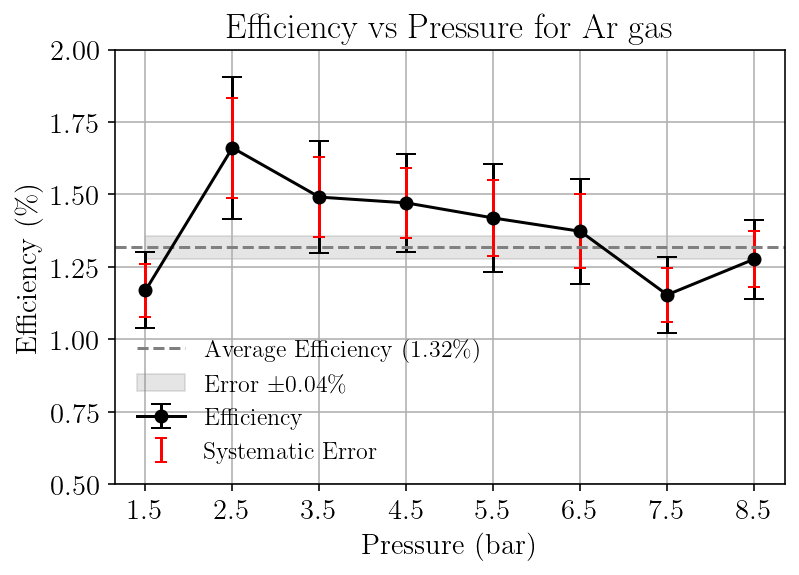

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Print the DataFrame for verification
print(efficiency_df)

# Ensure the 'Efficiency %' column is numeric
efficiency_df['Efficiency %'] = pd.to_numeric(efficiency_df['Efficiency %'], errors='coerce')
efficiency_df['Efficiency Error %'] = pd.to_numeric(efficiency_df['Efficiency Error %'], errors='coerce')
efficiency_df['Efficiency Error Systematic %'] = pd.to_numeric(efficiency_df['Efficiency Error Systematic %'], errors='coerce')

# Sort the DataFrame by Pressure to ensure proper plotting
efficiency_df = efficiency_df.sort_values(by='Pressure')

# Extract sorted arrays for plotting
pressure_arr = efficiency_df['Pressure'].values
efficiency_arr = efficiency_df['Efficiency %'].values
efficiency_err_arr = efficiency_df['Efficiency Error %'].values
efficiency_sys_err_arr = efficiency_df['Efficiency Error Systematic %'].values
# Mean and error
weights = 1 / (efficiency_err_arr ** 2)
weighted_mean_efficiency = np.sum(efficiency_arr * weights) / np.sum(weights)
weighted_mean_error = np.sqrt(1 / np.sum(weights))
plt.rc('text', usetex=True)
# Create the plot with error bars
combined_err_arr = np.sqrt(efficiency_err_arr**2 + efficiency_sys_err_arr**2)
plt.errorbar(pressure_arr, efficiency_arr, yerr=combined_err_arr, marker='o', linestyle='-', color='black', ecolor='black', capsize=5, label='Efficiency')

# Add smaller error bars for systematic errors
# plt.errorbar(pressure_arr, efficiency_arr, yerr=efficiency_sys_err_arr, fmt='none', ecolor='black', capsize=3, label='Systematic Error')
plt.errorbar(pressure_arr, efficiency_arr, yerr=efficiency_sys_err_arr, fmt='none', ecolor='red', capsize=3, linestyle='--', label='Systematic Error')

# Add a straight line for the average efficiency
plt.axhline(weighted_mean_efficiency, color='grey', linestyle='--', label=f'Average Efficiency ({weighted_mean_efficiency:.2f}\%)')

# Add a shaded area for the average error
plt.fill_between(pressure_arr, weighted_mean_efficiency - weighted_mean_error, weighted_mean_efficiency + weighted_mean_error, color='grey', alpha=0.2, label=f'Error ±{weighted_mean_error:.2f}\%')

# Add labels, title, and grid
plt.xlabel('Pressure (bar)')

plt.ylabel('Efficiency (\%)')  # Escape the percentage sign using a backslash
plt.title('Efficiency vs Pressure for Ar gas')
plt.ylim(0.5, 2.0)
plt.grid(True)
plt.legend()
plt.show()

In [91]:
# # Group the data by 'event' and sum the waveform (CH2) for each event
# summed_waveforms = calibration_data_ch1[0].groupby('event')['CH2'].sum()

# # Plot a histogram of the summed waveforms
# plt.figure(figsize=(10, 6))
# plt.hist(summed_waveforms, bins=200, color='blue', alpha=0.7, edgecolor='black')
# plt.xlabel('Summed Waveform Amplitude (mV)')
# plt.ylabel('Number of Events')
# plt.title('Histogram of Summed Waveforms (Fingerplot)')
# plt.grid()
# plt.show()

In [92]:


# # Loop through each dataframe and create histograms for each channel
# for i, df in enumerate(calibration_data_ch1):
#     print(f"Processing dataframe {i + 1}")
#     if i == 1:
#         break
    
#     # Baseline correction for the waveforms
#     # Iterate through the dataframe and apply baseline correction to each event
#     # Iterate through the dataframe and apply baseline correction to each event
#     for event in df['event'].unique():
#         event_mask = df['event'] == event
#         # Select only the first 100 points for the baseline calculation
#         baseline = df.loc[event_mask, 'CH2'].iloc[:100].mean()  # Calculate the mean of the first 100 points
#         df.loc[event_mask, 'CH2'] -= baseline  # Subtract the baseline from the waveform

#     # Group by 'event' and sum the waveforms for each channel
#     summed_wf = df.groupby('event')['CH2'].sum()

#     # Print the first few summed waveforms for verification
#     # Create histograms for each channel
#     fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis
#     ax.hist(summed_wf, bins=150, alpha=0.5, label='CH1', color='red')
#     # Add labels, title, and legend
#     ax.set_xlabel('Summed Waveform Amplitude (mV)')
#     ax.set_ylabel('Counts')
#     ax.set_title(f'Summed Waveforms for Dataframe {i + 1}')
#     plt.legend()
#     plt.savefig(save_dir + save_name + folder + f'_histogram_{i + 1}.' + save_ftype)
#     plt.show()

# print("Histograms created for all dataframes.")

In [93]:
# correction_limit = 110  # Number of samples to use for baseline correction

# # Loop through each dataframe and perform baseline correction
# for i, df in enumerate(dataframes):  # Enumerate to get the index and dataframe
#     print(f"Performing baseline correction for dataframe {i + 1}")

#     # Perform baseline correction for each channel
#     for channel in ['CH1', 'CH2', 'CH3', 'CH4']:
#         if channel in df.columns:
#             baseline = df[channel][:correction_limit].mean()  # Calculate the baseline
#             df[channel] = df[channel] - baseline  # Subtract the baseline from all samples

#     # Plot only the first event of the first dataframe for visualization
#     if i == 0:
#         # Filter the dataframe to include only the first event
#         first_event = df[df['event'] == df['event'].iloc[10]]  # Assuming 'EVENT' column identifies events
    
#         time = first_event['TIME'].to_numpy()  # Convert to NumPy array
#         ch1 = first_event['CH1'].to_numpy()  # Convert to NumPy array
#         ch2 = first_event['CH2'].to_numpy()  # Convert to NumPy array
#         ch3 = first_event['CH3'].to_numpy()  # Convert to NumPy array
#         ch4 = first_event['CH4'].to_numpy()  # Convert to NumPy array
    
#         # Plot the data
#         fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis
#         ax.plot(time, ch1, label='CH1', color='red')
#         ax.plot(time, ch2, label='CH2', color='green')
#         ax.plot(time, ch3, label='CH3', color='blue')
#         ax.plot(time, ch4, label='CH4', color='black')
    
#         # Add a vertical line at the correction limit
#         vertical_line_time = time[correction_limit - 1]  # Get the time corresponding to the correction limit
#         ax.axvline(x=vertical_line_time, color='purple', linestyle='--', label='Correction Limit')
    
#         # Add labels, title, and legend
#         ax.set_xlabel('Time (s)')
#         ax.set_ylabel('Amplitude (mV)')
#         ax.set_title(f'First event of the first dataframe after baseline correction')
#         plt.legend()
#         plt.savefig(save_dir + save_name + folder + '.' + save_ftype)
#         plt.show()

# print("Baseline correction completed for all dataframes.")

In [94]:
# # Loop through each dataframe and create histograms for each channel
# for i, df in enumerate(dataframes):
#     print(f"Processing dataframe {i + 1}")

#     # Group by 'EVENT' and sum the waveforms for each channel
#     ch1_sums = df.groupby('event')['CH1'].sum()
#     ch2_sums = df.groupby('event')['CH2'].sum()
#     ch3_sums = df.groupby('event')['CH3'].sum()
#     ch4_sums = df.groupby('event')['CH4'].sum()

#     # Print the first few summed waveforms for verification
#     # Create histograms for each channel
#     fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis
#     ax.hist(ch1_sums, bins=100, alpha=0.5, label='CH1', color='red')
#     ax.hist(ch2_sums, bins=100, alpha=0.5, label='CH2', color='green')
#     ax.hist(ch3_sums, bins=100, alpha=0.5, label='CH3', color='blue')
#     ax.hist(ch4_sums, bins=100, alpha=0.5, label='CH4', color='black')
#     # Add labels, title, and legend
#     ax.set_xlabel('Summed Waveform Amplitude (mV)')
#     ax.set_ylabel('Counts')
#     ax.set_title(f'Summed Waveforms for Dataframe {i + 1}')
#     plt.legend()
#     plt.savefig(save_dir + save_name + folder + f'_histogram_{i + 1}.' + save_ftype)
#     plt.show()

# print("Histograms created for all dataframes.")